In [1]:
#importing the libraries
import glob
import astropy
import numpy as np
from wotan import flatten
from astropy.timeseries import LombScargle, BoxLeastSquares
import matplotlib.pyplot as plt
%matplotlib inline

Now running: processedLC/3421840993510952192.txt


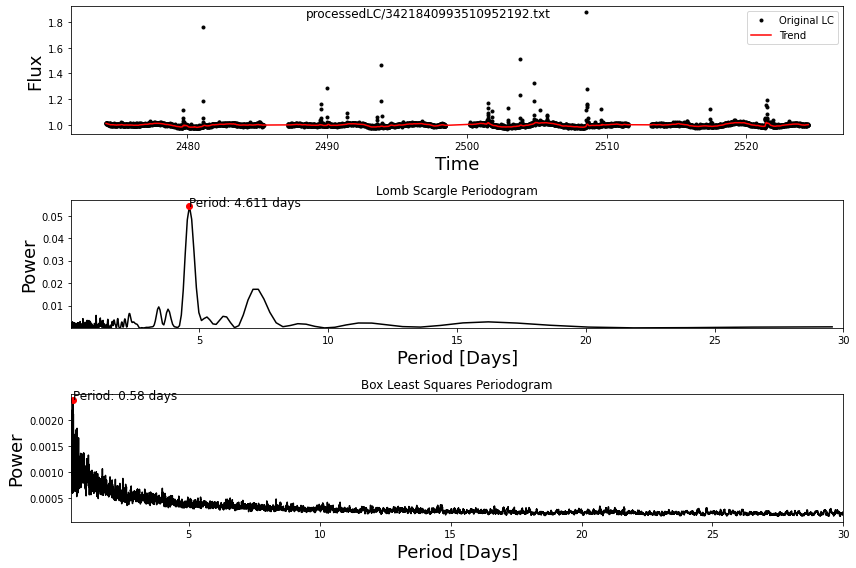

Now running: processedLC/6759481141756109056.txt


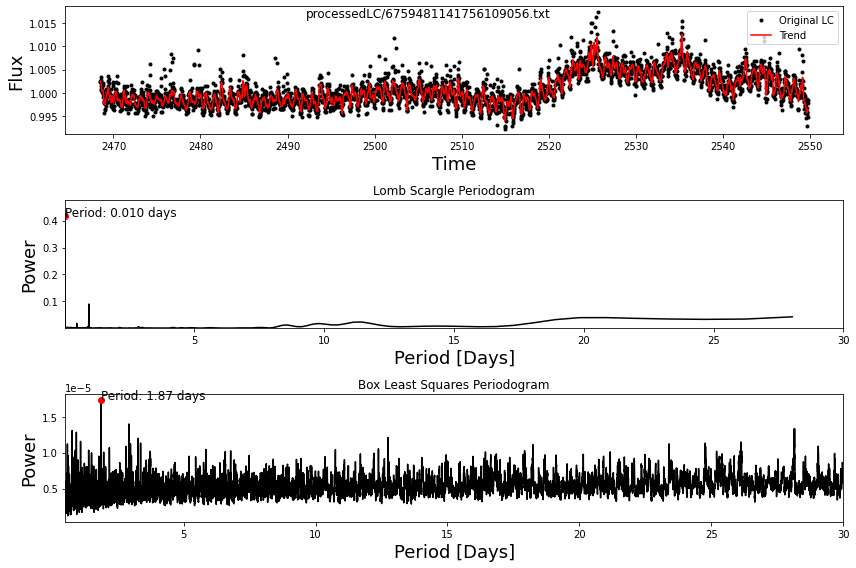

Now running: processedLC/1380293091823646720.txt


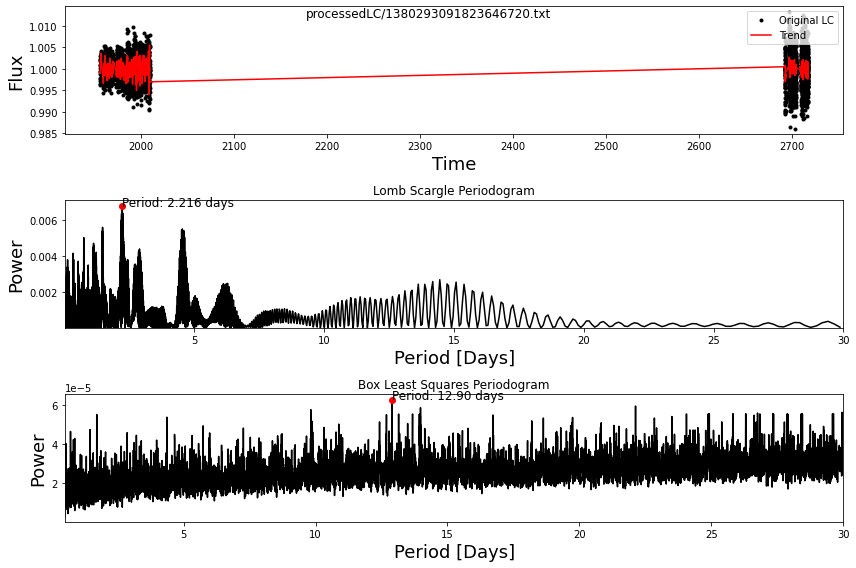

Now running: processedLC/5100356956302641536.txt


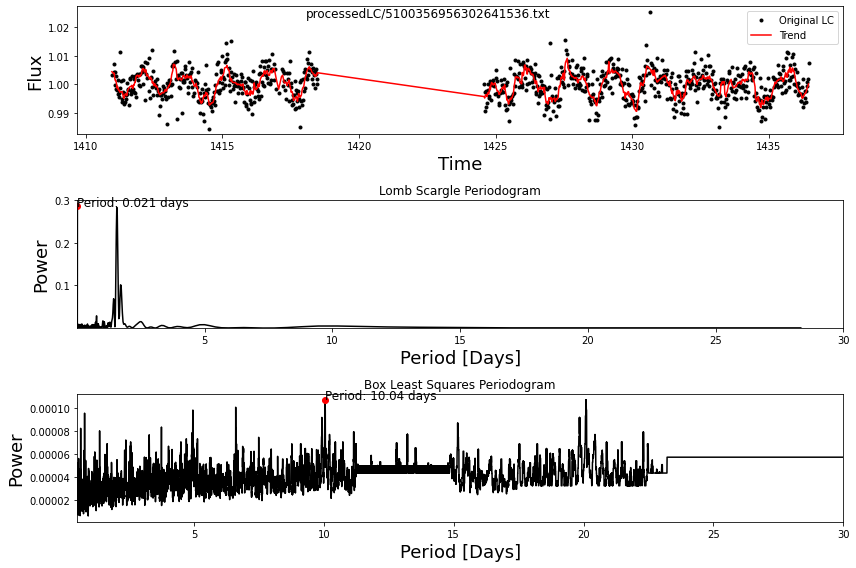

Now running: processedLC/740931340878555904.txt


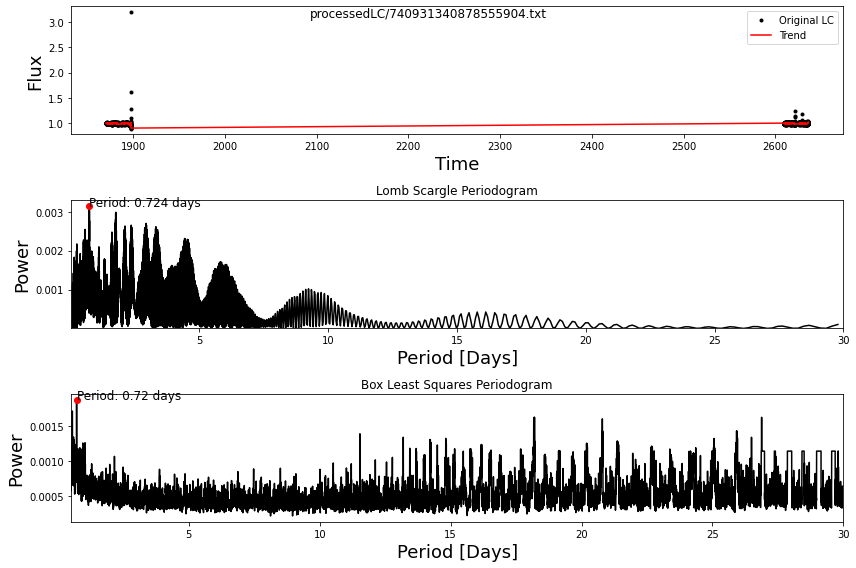

Now running: processedLC/5469802724480366848.txt


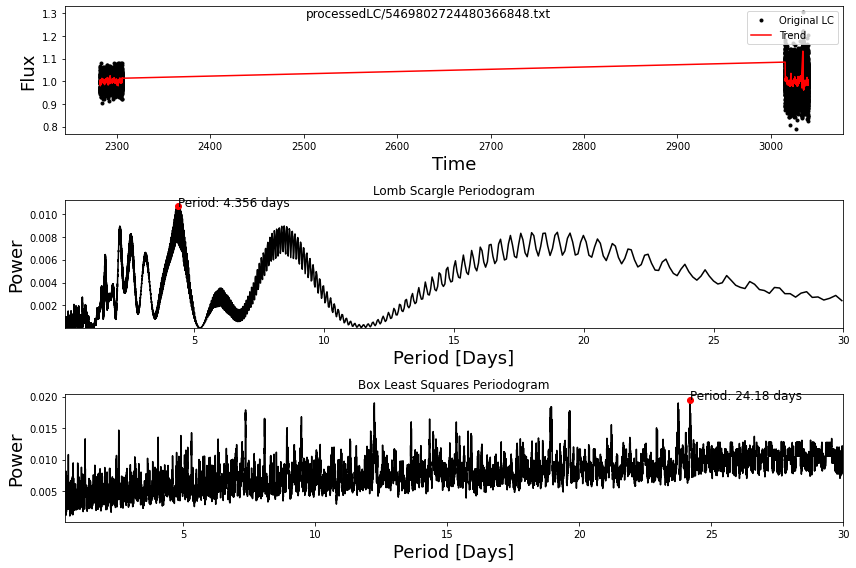

Now running: processedLC/2393563872239260928.txt


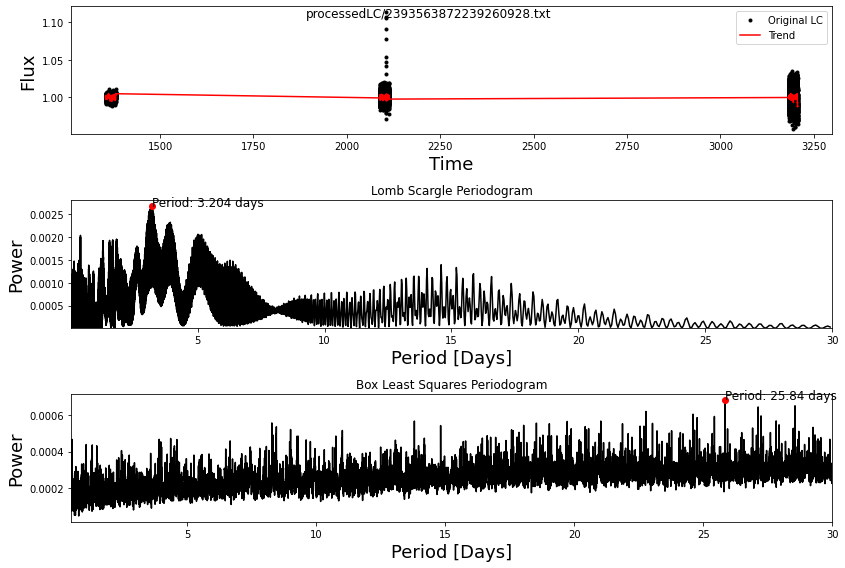

Now running: processedLC/703978507417193344.txt


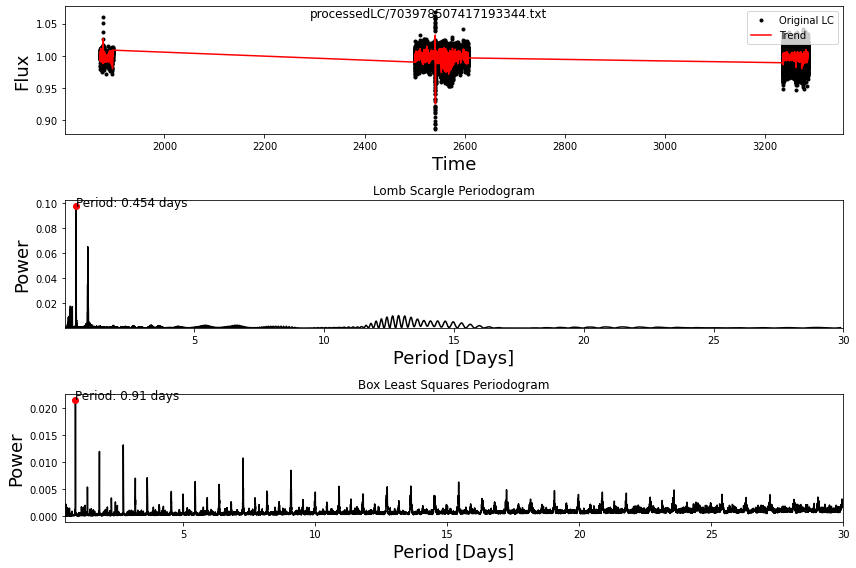

Now running: processedLC/31235033696866688.txt


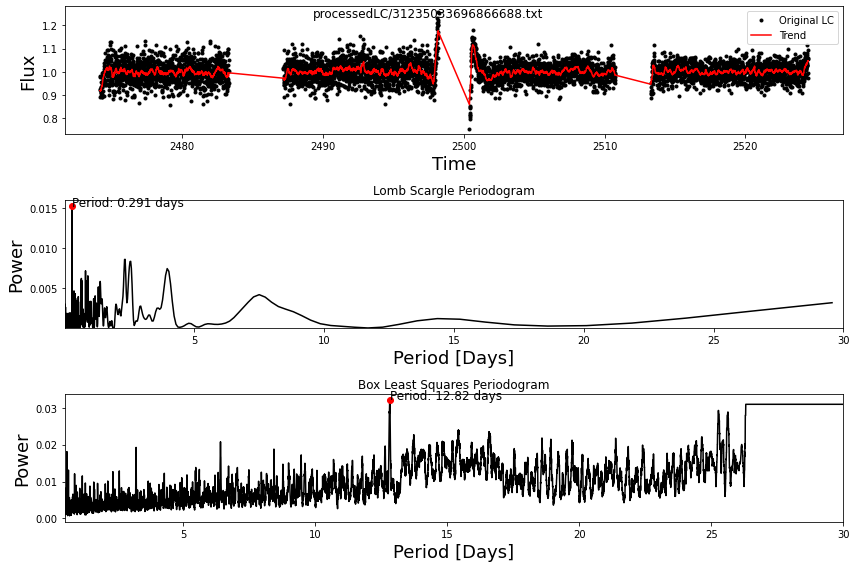

posx and posy should be finite values


Now running: processedLC/5321049521489667328.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


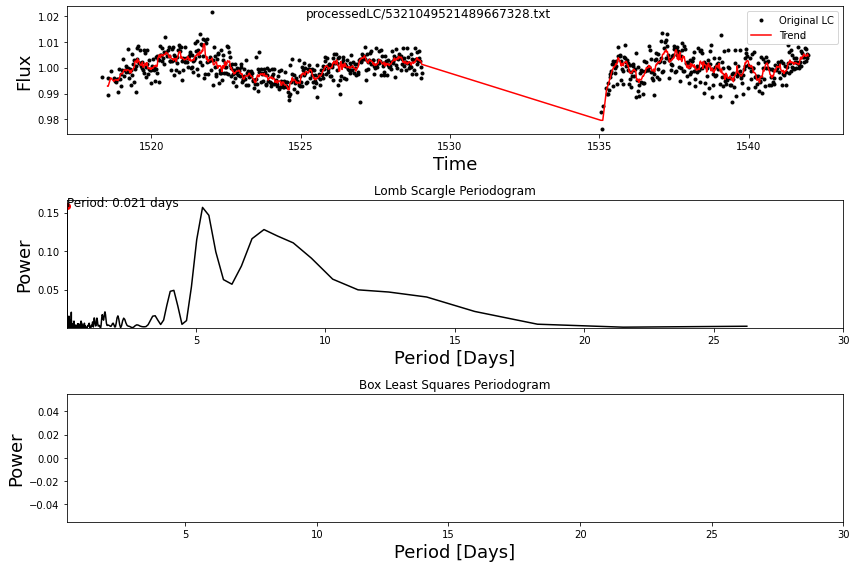

Now running: processedLC/6225138041345032448.txt


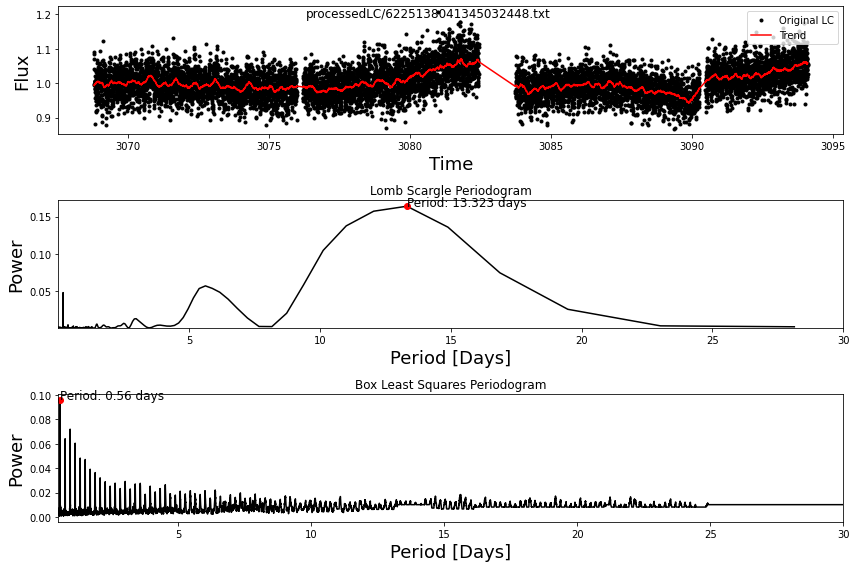

Now running: processedLC/1798588409277193984.txt


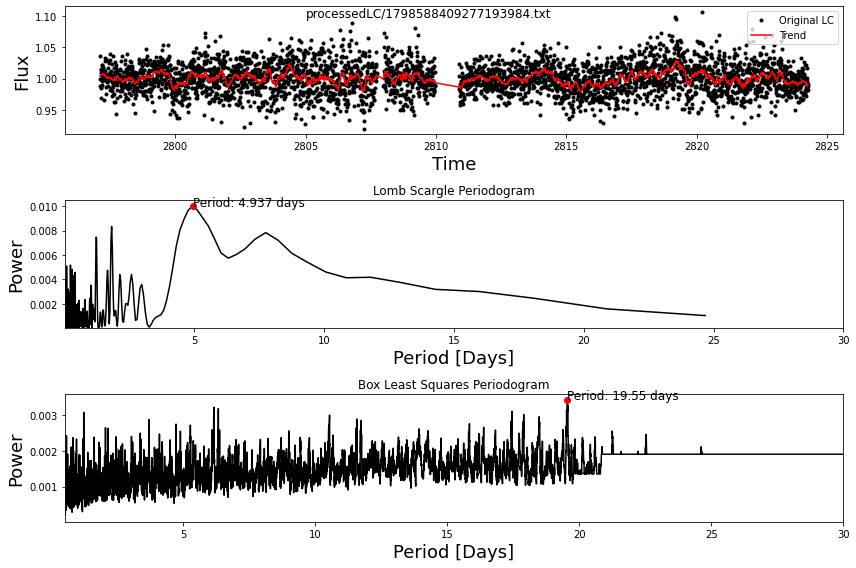

Now running: processedLC/3493736924979792768.txt


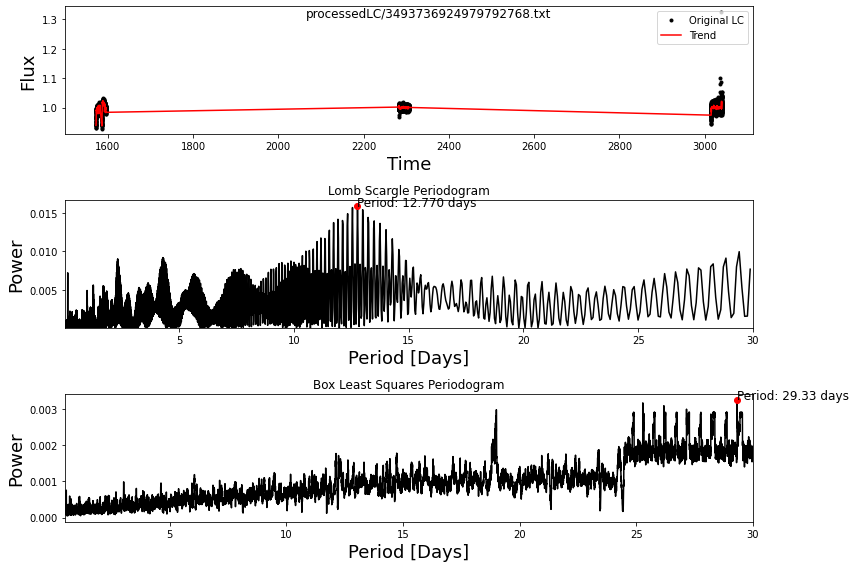

Now running: processedLC/1272178319624018816.txt


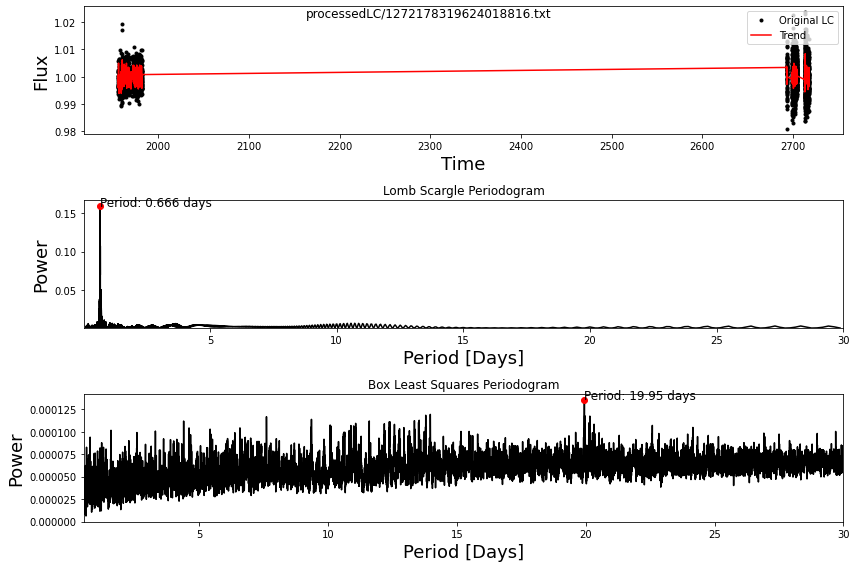

Now running: processedLC/6119528334597735296.txt


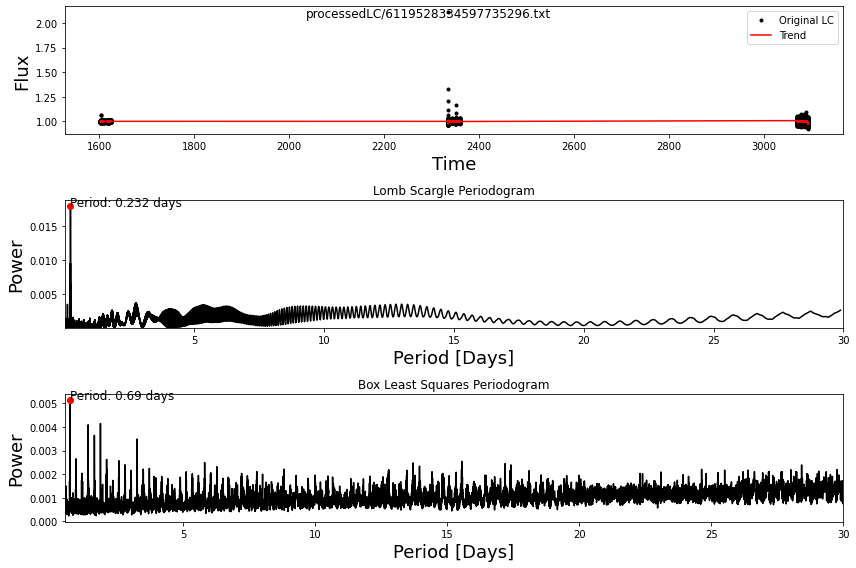

Now running: processedLC/4250327781042868224.txt


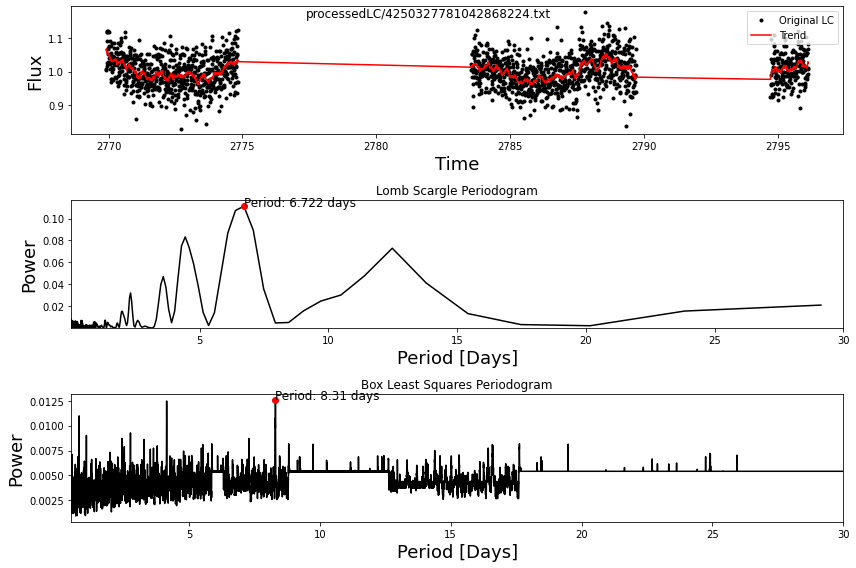

Now running: processedLC/1762524526668814208.txt


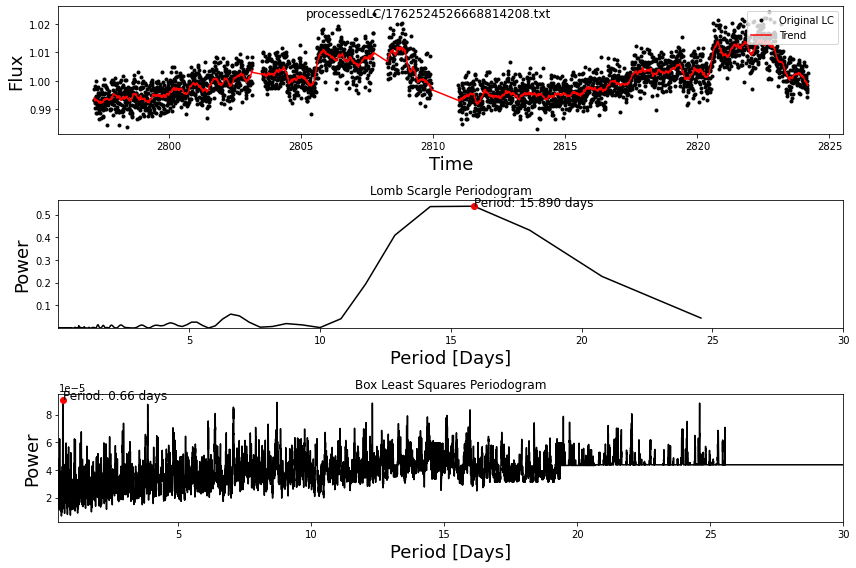

Now running: processedLC/5723739672264914176.txt


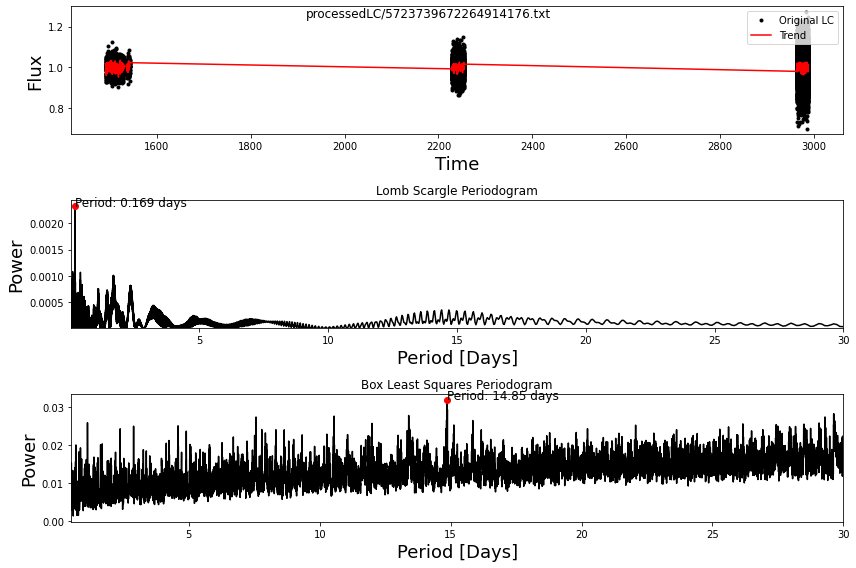

posx and posy should be finite values


Now running: processedLC/5661194163772723072.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


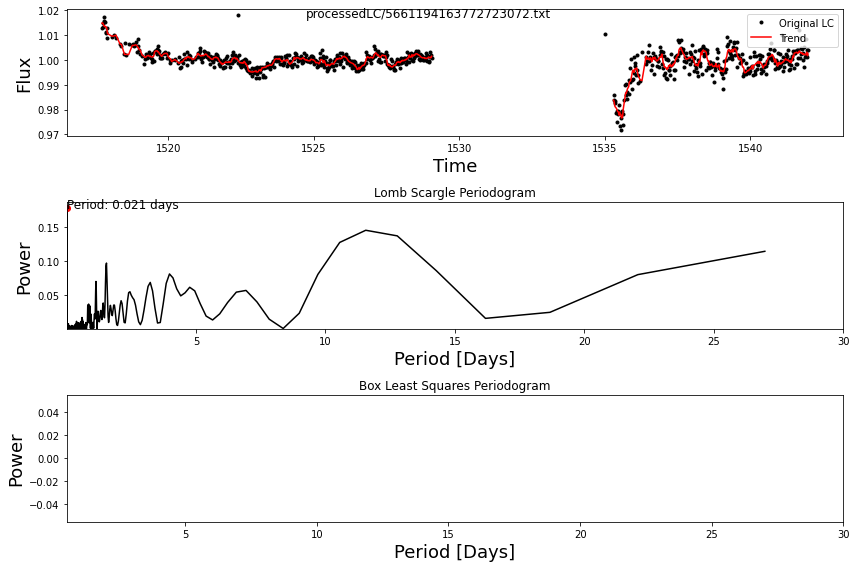

Now running: processedLC/1262763648230973440.txt


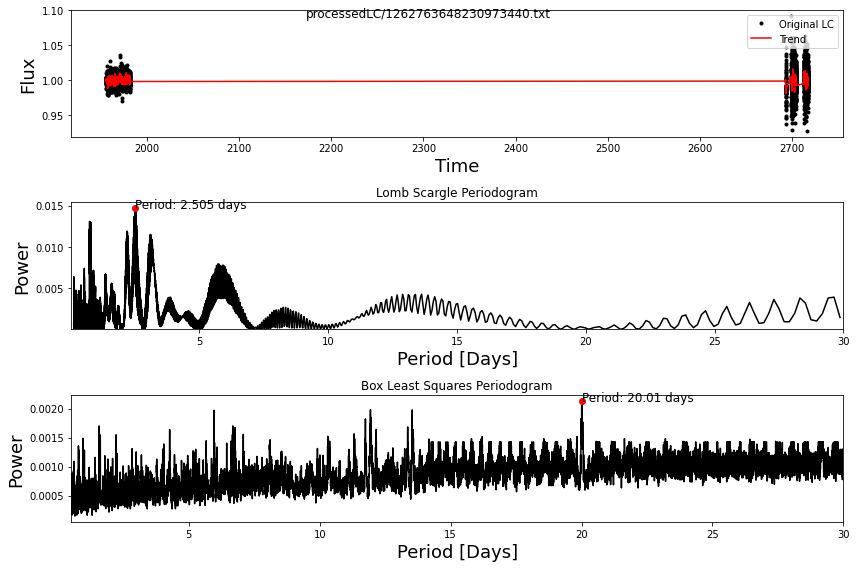

Now running: processedLC/3048537073399263360.txt


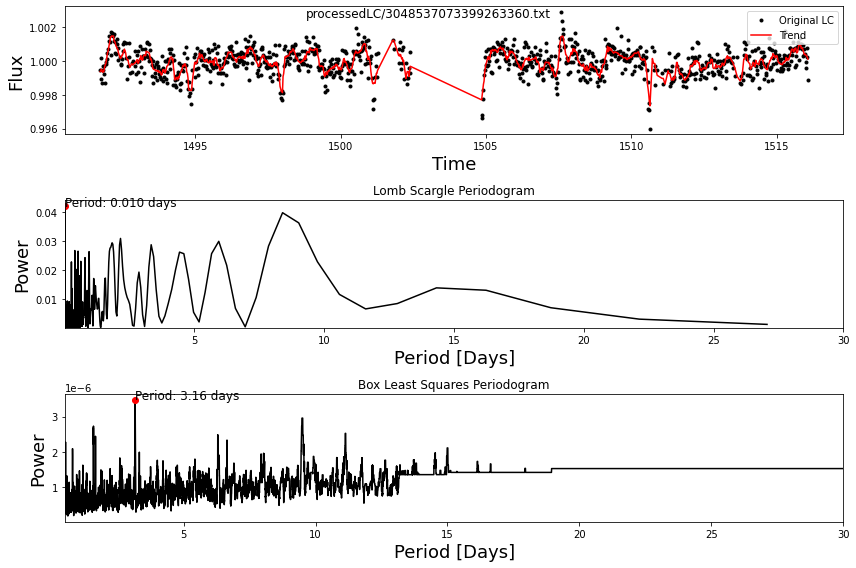

Now running: processedLC/5235273458327588224.txt


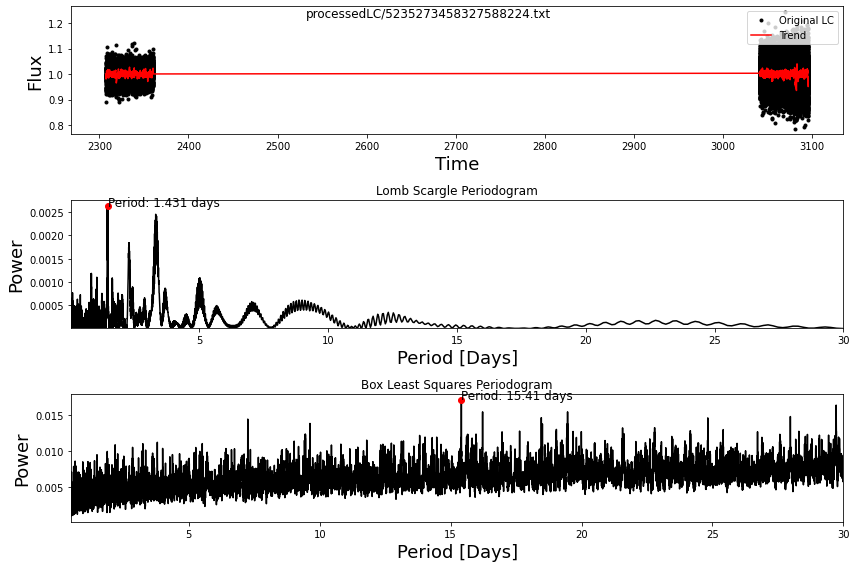

Now running: processedLC/423026756506669952.txt


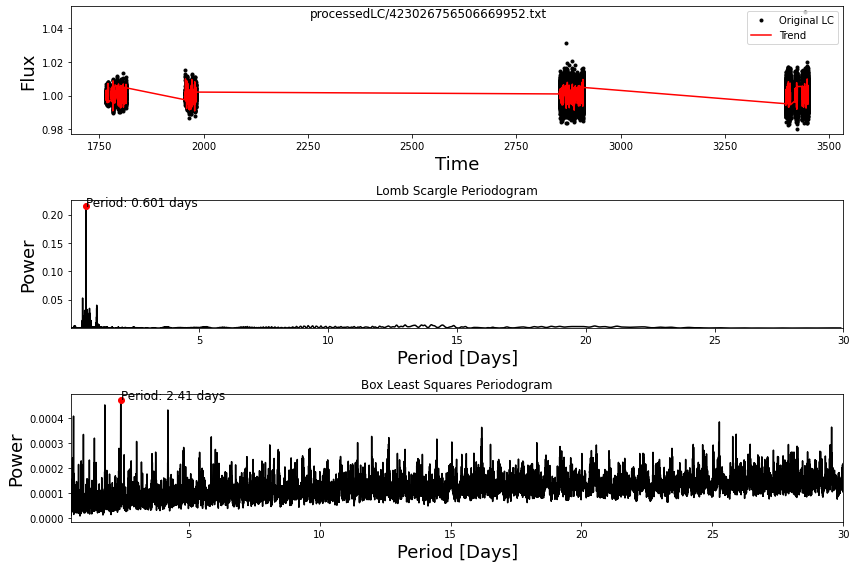

posx and posy should be finite values


Now running: processedLC/3257254994871286400.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


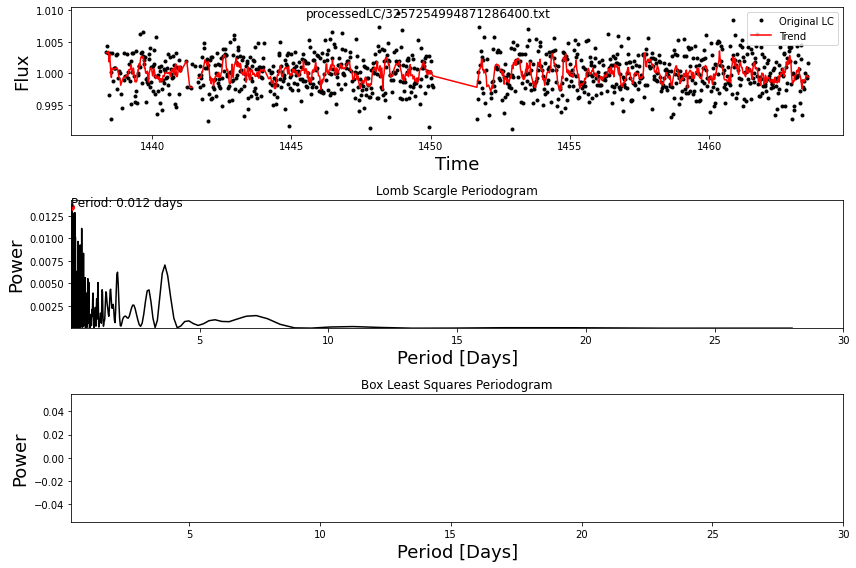

Now running: processedLC/599891555546067200.txt


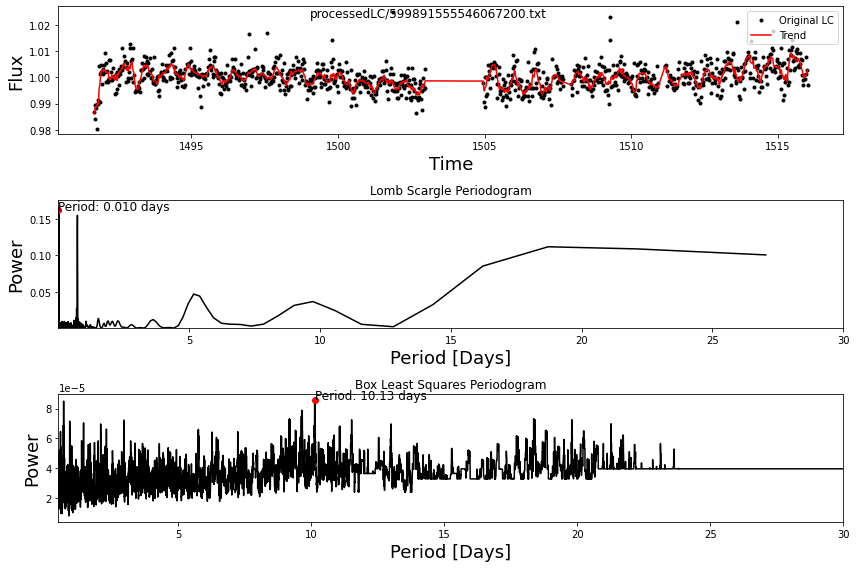

posx and posy should be finite values


Now running: processedLC/3005422611125997568.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


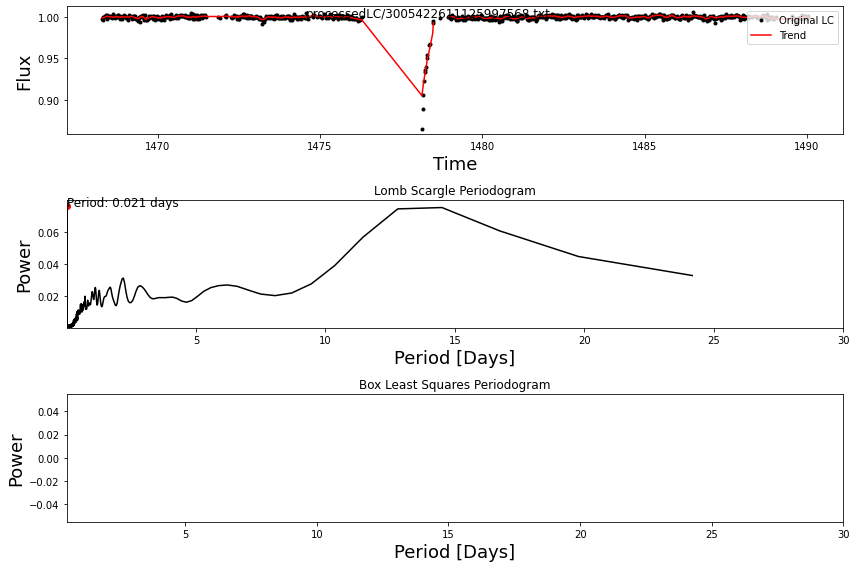

posx and posy should be finite values


Now running: processedLC/4656781839316354816.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


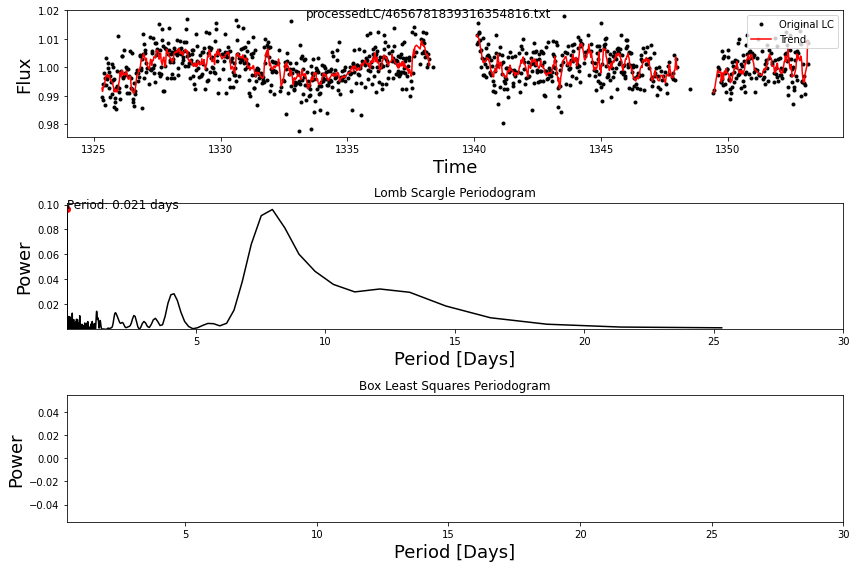

Now running: processedLC/6057069339664907776.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


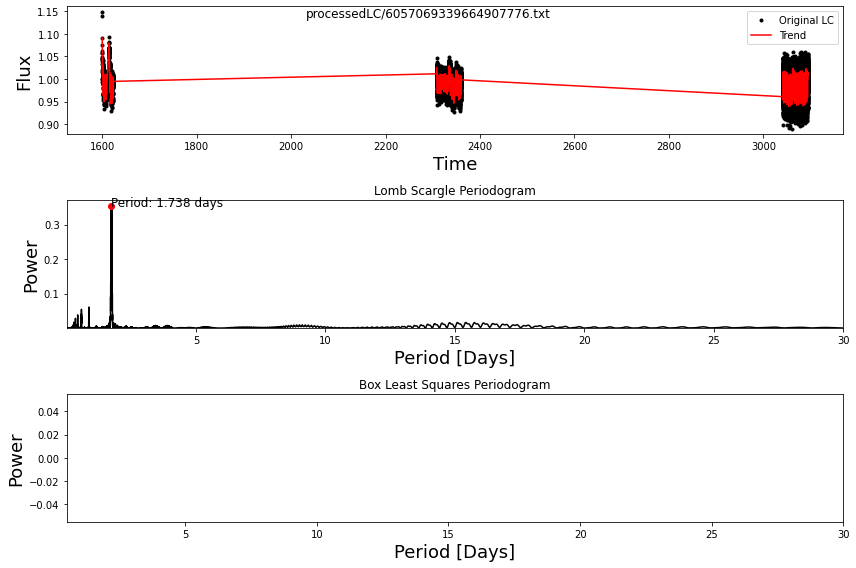

Now running: processedLC/2945644534751752704.txt


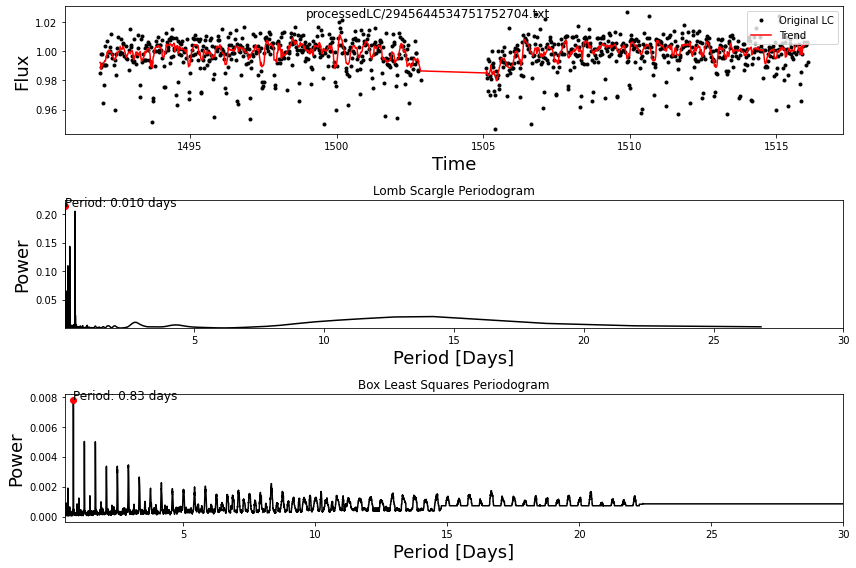

Now running: processedLC/5595785866305529216.txt


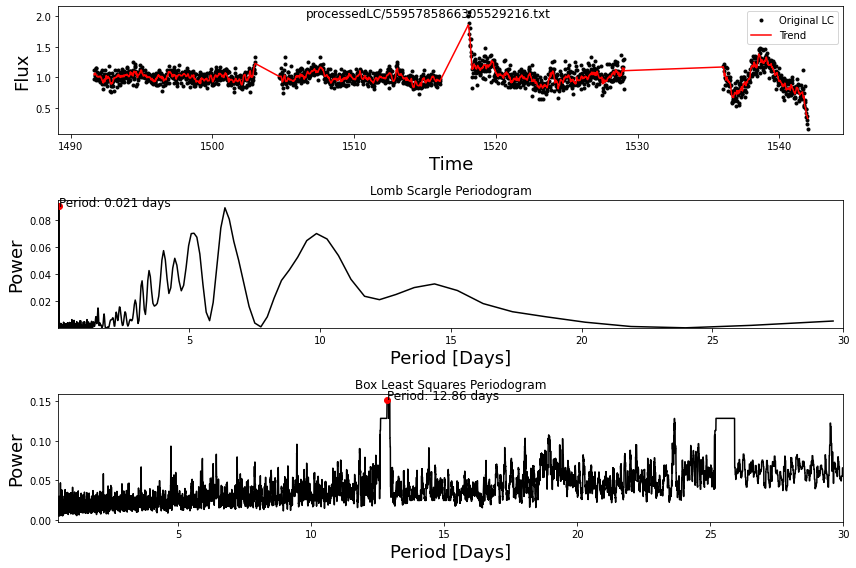

Now running: processedLC/3135477931704572800.txt


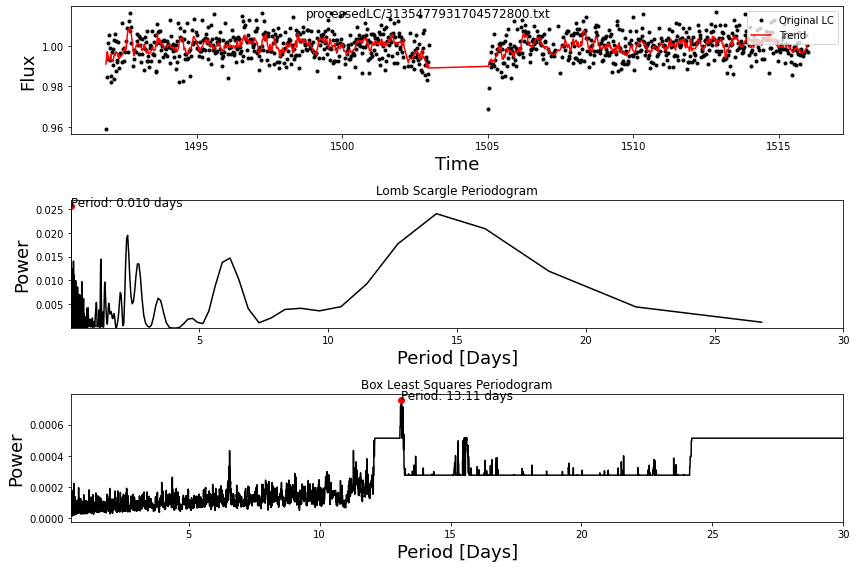

Now running: processedLC/1287312100751643776.txt


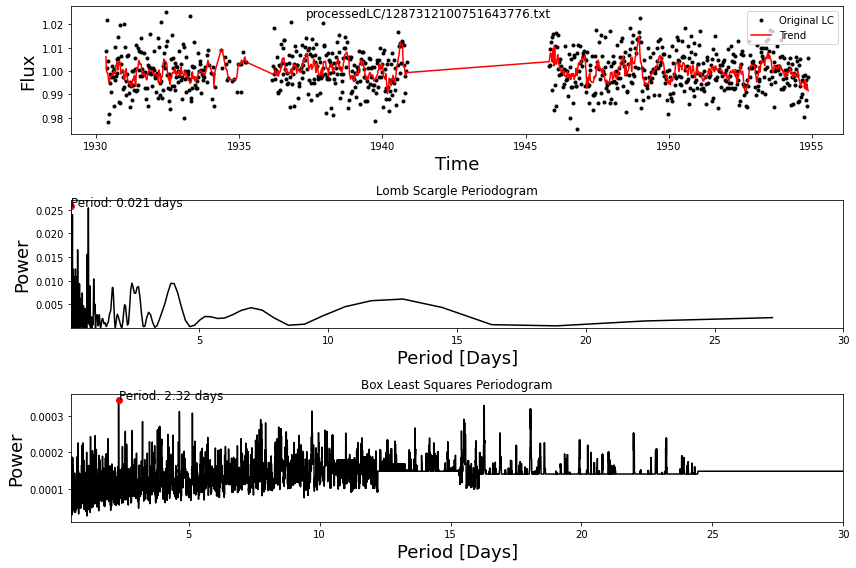

Now running: processedLC/4871414343064541824.txt


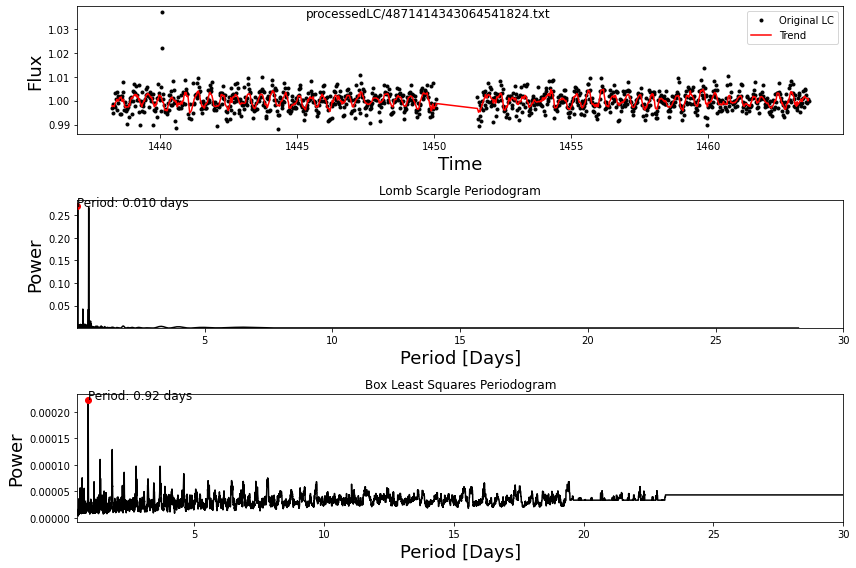

Now running: processedLC/3005434362156520704.txt


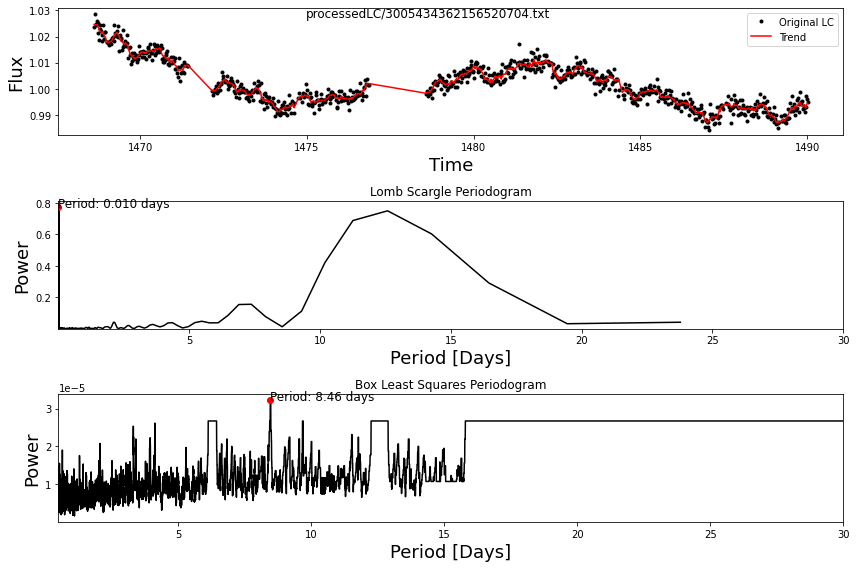

Now running: processedLC/1612801833587498240.txt


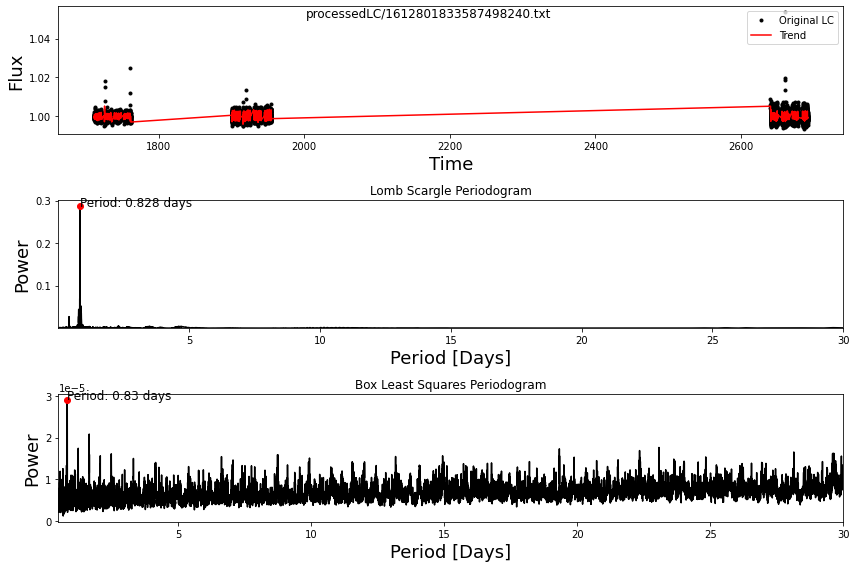

Now running: processedLC/6406967509044866560.txt


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


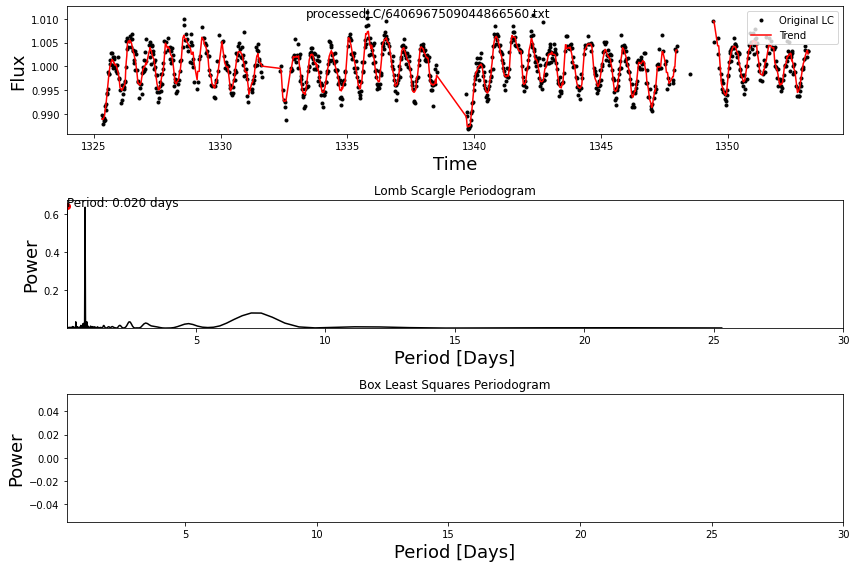

In [2]:

allLightCurves = glob.glob("processedLC/*.txt")

for lc in allLightCurves:
    #Flatten the light curve
    data = np.loadtxt(lc)
    
    print("Now running:", lc)
    
    
    # Remove the NaNs
    mask = ~np.isnan(data[:, 0]) & ~np.isnan(data[:, 1])
    time = data[:, 0][mask]
    flux = data[:, 1][mask]
    
    # Flatten the light curve
    flattenedLC, trendLine = flatten(time, flux, method='biweight', window_length=0.20, return_trend=True)
    
    
    #Run Lomb scargle 
    frequencyLS, powerLS = LombScargle(data[:,0], data[:,1]).autopower()
    periodLS = 1/frequencyLS
    selectIndex = np.where((periodLS > 0.01) & (periodLS < 30))
    frequencyLS = frequencyLS[selectIndex]
    powerLS = powerLS[selectIndex]
    
    
    #remove outliers to find proper transits. Not implemented currently.
    model = BoxLeastSquares(data[:,0], flattenedLC)

    periodsBLS = np.linspace(0.5, 30, 10000)
    BLS = model.power(periodsBLS, 0.1)
    powerBLS = BLS.power


    fig, ax = plt.subplots(3, 1, figsize=(12,8))
    ax[0].plot(data[:,0], data[:,1], "k.", label='Original LC')
    ax[0].plot(data[:,0], trendLine, "r-", label='Trend')
    #ax[0].set_title("Original Light Curve")
    ax[0].set_xlabel("Time", fontsize=18)
    ax[0].set_ylabel("Flux", fontsize=18)
    ax[0].legend(loc=1)

    
    ax[1].plot(1/frequencyLS, powerLS, "k-", label='Lomb Scargle')
    LSMaxPeriod = 1/frequencyLS[np.argmax(powerLS)]
    LSMaxPower = np.max(powerLS)
    ax[1].plot(LSMaxPeriod, LSMaxPower, "ro")
    ax[1].text(LSMaxPeriod, LSMaxPower, f"Period: {LSMaxPeriod:.3f} days", fontsize=12)
    ax[1].set_title("Lomb Scargle Periodogram")
    ax[1].set_xlabel("Period [Days]", fontsize=18)
    ax[1].set_ylabel("Power", fontsize=18)
    #ax[1].set_xscale('log')
    ax[1].set_ylim(bottom=0.00001)
    ax[1].set_xlim(0.01, 30)

    #mark the maximum peak
    ax[2].plot(periodsBLS, powerBLS, "k-")
    maxPower = np.max(powerBLS)
    maxPeriod = periodsBLS[np.argmax(powerBLS)]
    ax[2].plot(maxPeriod, maxPower, "ro")
    ax[2].text(maxPeriod, maxPower, f"Period: {maxPeriod:.2f} days", fontsize=12)
    ax[2].set_title("Box Least Squares Periodogram")
    ax[2].set_xlabel("Period [Days]", fontsize=18)
    ax[2].set_ylabel("Power", fontsize=18)
    ax[2].set_xlim(0.5, 30)
    plt.tight_layout()
    plt.suptitle(lc)
    plt.savefig("figures/"+lc.split("/")[-1][:-4]+".png")
    plt.show()